In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import re
import string

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data - data.csv/data - data.csv')
df.head(10)

,comment,label,rate,Unnamed: 3
0,Áo bao đẹp ạ!!,POS,5,NaN
1,Tuyệt vời !,POS,5,NaN
2,2day ao khong giong trong.,NEG,1,NaN
3,"Mùi thơm,bôi lên da mềm da.",POS,5,NaN
4,"Vải đẹp, dày dặn.",POS,5,NaN
5,"Hàng rất đẹp, rất chi là ưng ý.",POS,5,NaN
6,"Chất lượng sản phẩm tốt, date dài.",POS,5,NaN
7,Ăn nói và thái độ phục vụ tốt.,POS,4,NaN
8,Đóng gói sản phẩm chắc chắn.,POS,5,NaN
9,tất sờn hết ca chưa dùng mà vay r.,NEG,2,NaN


In [ ]:
df = pd.DataFrame(df)
df.drop('rate', axis =1, inplace = True)
df.drop('Unnamed: 3', axis = 1, inplace = True)
print(df)

                                                 comment label
0                                         Áo bao đẹp ạ!!   POS
1                                            Tuyệt vời !   POS
2                             2day ao khong giong trong.   NEG
3                            Mùi thơm,bôi lên da mềm da.   POS
4                                      Vải đẹp, dày dặn.   POS
...                                                  ...   ...
31455                                   Không đáng tiền.   NEG
31456                                      Quần rất đẹp.   POS
31457                            Hàng đẹp đúng giá tiền.   POS
31458                                   Chất vải khá ổn.   POS
31459  áo rất ok nhé , vải mịn , len cao cổ này phối ...   POS

[31460 rows x 2 columns]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31460 entries, 0 to 31459
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   comment     31460 non-null  object
 1   label       31460 non-null  object
 2   rate        31460 non-null  int64 
 3   Unnamed: 3  23 non-null     object
dtypes: int64(1), object(3)
memory usage: 983.2+ KB


In [ ]:
df =df.drop_duplicates("comment")
df = df.dropna()

In [ ]:
# TIEN XU LI DU LIEU

emoji_pattern = re.compile("["
                u"\U0001F600-\U0001F64F"  # emoticons
                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                u"\U0001F680-\U0001F6FF"  # transport & map symbols
                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                u"\U00002702-\U000027B0"
                u"\U000024C2-\U0001F251"
                u"\U0001f926-\U0001f937"
                u'\U00010000-\U0010ffff'
                u"\u200d"
                u"\u2640-\u2642"
                u"\u2600-\u2B55"
                u"\u23cf"
                u"\u23e9"
                u"\u231a"
                u"\u3030"
                u"\ufe0f"
    "]+", flags=re.UNICODE)

def clean_text(text):
    text = text.lower()
    text = re.sub(emoji_pattern, " ", text)
    text = re.sub(r"https?://\S+|www\.\S+", "", text).lower()
    text = re.sub(r'([a-z]+?)\1+',r'\1', text)
    text = re.sub(r"(\w)\s*([" + string.punctuation + "])\s*(\w)", r"\1 \2 \3", text)
    text = re.sub(r"(\w)\s*([" + string.punctuation + "])", r"\1 \2", text)
    # text = re.sub(r"(\d)([^\d.])", r"\1 \2", text)
    # text = re.sub(r"([^\d.])(\d)", r"\1 \2", text)
    text = re.sub(f"([{string.punctuation}])([{string.punctuation}])+",r"\1", text)
    text = text.strip()
    while text.endswith(tuple(string.punctuation+string.whitespace)):
        text = text[:-1]
    while text.startswith(tuple(string.punctuation+string.whitespace)):
        text = text[1:]
    text = re.sub(r"\s+", " ", text)
    return text

In [ ]:
df["comment"] = df["comment"].map(lambda text: clean_text(text))

In [ ]:
df.sample(10)

,comment,label
12927,yêu shop,POS
13768,bự quá,NEG
16476,áo 250 ngàn mà may như áo chợ vậy,NEG
26475,nhưng chất liệu k như bên shop đã chú thích,NEG
20371,rất đáng tiền .shop gói sp bao đẹp và chắc chắ...,POS
8995,cảm ơn shop nhiều ah,POS
2848,chất lượng sản phẩm rất kém đóng gói sản phẩm ...,NEG
8593,chỉ là tiền ship thì đắt hơn hồi đó thui,POS
6462,mua cùng 1 loại nhưng cái áo này loại khác,NEU
818,"mũ rất xinh ý , len mềm co giãn tốt , đội xinh...",POS


In [ ]:
df=df.drop_duplicates("comment")
df = df.dropna()

In [ ]:
df = df.drop(df[df["comment"].map(len) < 2].index)

In [ ]:
df.comment.shape
df.label.shape

(25599,)

label
POS    15248
NEG     6213
NEU     4138
Name: count, dtype: int64


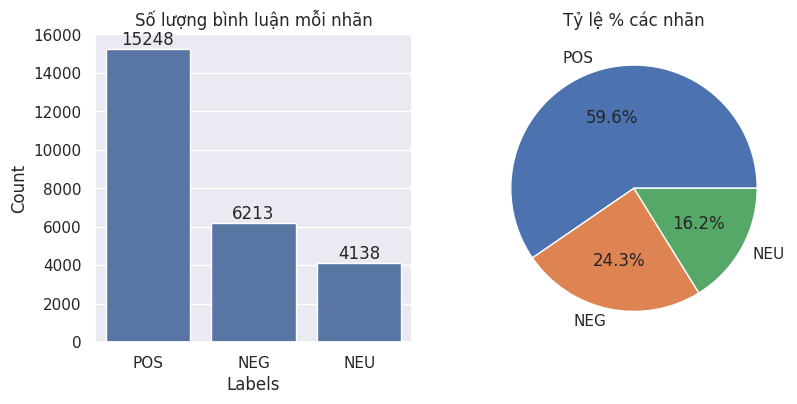

In [ ]:
# Count the number of comments for each label
label_counts = df["label"].value_counts()
print(label_counts)
# visualize count of labels
sns.set()
fig, (ax_bar, ax_pie) = plt.subplots(ncols=2, figsize=(9, 4))

# bar plot
sns.barplot(x=label_counts.index, y=label_counts.values, ax=ax_bar)
# Add labels and title to the plot
ax_bar.set_xlabel("Labels")
ax_bar.set_ylabel("Count")
ax_bar.set_title("Số lượng bình luận mỗi nhãn")
# Add count number for each bar
for i, count in enumerate(label_counts.values):
    ax_bar.text(i, count, str(count), ha="center", va="bottom")

# pie plot
ax_pie.pie(label_counts.values, labels=label_counts.index, autopct="%1.1f%%")
ax_pie.set_title("Tỷ lệ % các nhãn")
plt.show()

In [ ]:
# split data to train and test set
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
# save to csv files
train_df.to_csv("/content/drive/MyDrive/data/train.csv", encoding="utf-8", index=False)
test_df.to_csv("/content/drive/MyDrive/data/test.csv", encoding="utf-8", index=False)

In [ ]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20479 entries, 6555 to 29003
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  20479 non-null  object
 1   label    20479 non-null  object
dtypes: object(2)
memory usage: 480.0+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 5120 entries, 11945 to 230
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  5120 non-null   object
 1   label    5120 non-null   object
dtypes: object(2)
memory usage: 120.0+ KB
